In [ ]:
dict_film_years = {}

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_table_from_wikipedia(url):
    response = requests.get(url)
    if not response.ok:
        print("Errore durante il recupero della pagina.")
        return

    soup = BeautifulSoup(response.text, "html.parser")

    # Troviamo tutte le tabelle nella pagina
    tables = soup.find_all("table")
    #print(tables[0].find("tbody"))
    # Iteriamo sulle tabelle e cerchiamo quella che contiene l'header desiderato

    # Creiamo un dizionario per salvare i dati della tabella
    
    table_data = []

    # Iteriamo sulle righe della tabella
    for row in tables[0].find("tbody").find_all("tr")[1:]:  # Ignoriamo la prima riga perché contiene l'header
        # Troviamo la cella nella prima colonna
        cell = row.find("td")
        # Salviamo l'informazione di interesse nella lista
        if cell:
            info = cell.text.strip()
            #print(info)
            table_data.append(info)

    return table_data

['The Polka King', 'Step Sisters', 'The Open House', 'A Futile and Stupid Gesture', 'The Cloverfield Paradox', 'When We First Met', 'Love Per Square Foot', 'Irreplaceable You', 'Mute', 'The Outsider', 'Benji', 'Game Over, Man!', 'Paradox', 'Roxanne Roxanne', 'Happy Anniversary', 'First Match', '6 Balloons', 'Amateur', 'Come Sunday', 'I Am Not an Easy Man', 'Dude', 'Candy Jar', 'The Week Of', 'Sometimes', 'Forgive Us Our Debts', 'The Kissing Booth', 'Cargo', 'Ibiza', "Sara's Notebook", 'Alex Strangelove', 'Set It Up', 'Lust Stories', 'To Each, Her Own', 'Calibre', 'TAU', 'The Legacy of a Whitetail Deer Hunter', 'How It Ends', 'Father of the Year', 'Duck Duck Goose', 'Extinction', 'Brij Mohan Amar Rahe', 'Like Father', 'The Package', 'To All the Boys I’ve Loved Before', 'The After Party', 'Sierra Burgess Is a Loser', 'The Most Assassinated Woman in the World', 'On My Skin', 'The Land of Steady Habits', 'The Angel', 'Nappily Ever After', 'Hold the Dark', 'Private Life', '22 July', 'Apostl

In [ ]:
dict_film_years["2015"] = ["Beasts of No Nation","A Very Murray Christmas","The Ridiculous 6"]


In [ ]:
dict_film_years["2016"] = ["Crouching Tiger, Hidden Dragon: Sword of Destiny",
"Pee-Wee's Big Holydays",
"Special Correspondents",
"The Do-Over",
"Altruisti si diventa",
"Brahman Naman",
"Rebirth",
"Tallulah",
"XOXO",
"ARQ",
"La battaglia di Jadotville",
"Justin Timberlake + The Tennessee Kids",
"Mascots",
"Sono la bella creatura che vive in questa casa",
"7 años",
"Autobiografia di un finto assassino",
"Mercy",
"Spectral",
"Barry",
"Il terrore del silenzio"]

In [ ]:
dict_film_years["2017"] = ["Coin Heist - Colpo alla zecca",
"Clinical",
"Ricomincio da nudo",
"iBoy",
"Sandy Wexler",
"I Don't Feel at Home in This World Anymore",
"The Discovery - La scoperta",
"Castello di sabbia",
"War Machine",
"Little Evil",
"Shimmer Lake",
"You Get Me",
"Okja",
"Fino all'osso",
"Death Note - Il quaderno della morte",
"Per primo hanno ucciso mio padre",
"Cargo",
"Il gioco di Gerald",
"Le nostre anime di notte",
"Burning Sands - Il codice del silenzio",
"Un principe per Natale",
"La babysitter",
"The Polka King",
"The Meyerowitz Stories",
"1922",
"L'autista",
"Un'eredità per Natale",
"Bright"]

In [ ]:
# Itera attraverso gli anni dal 2018 al 2022
for year in range(2018, 2023):
    # URL della pagina Wikipedia per l'anno corrente
    url = f"https://en.wikipedia.org/wiki/List_of_Netflix_original_films_({year})"
    
    # Esegui lo scraping della tabella per l'anno corrente
    result = scrape_table_from_wikipedia(url)
    
    # Aggiungi il risultato al dizionario utilizzando l'anno come chiave
    dict_film_years[str(year)] = result
    
    # Stampare il risultato (opzionale)
    print(f"Risultato per l'anno {year}: {result}")

# Stampare il dizionario completo (opzionale)
print(dict_film_years)

In [ ]:
dict_film_years.keys()

dict_keys(['2018', '2019', '2020', '2021', '2022', '2015', '2016', '2017'])

In [ ]:
import json
# Specifica il nome del file in cui vuoi salvare il dizionario JSON
file_name = '/work/netflix/movies.json'

# Salvare il dizionario come JSON utilizzando json.dump()
with open(file_name, 'w', encoding='utf-8') as json_file:
    json.dump(dict_film_years, json_file, ensure_ascii=False, indent=4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


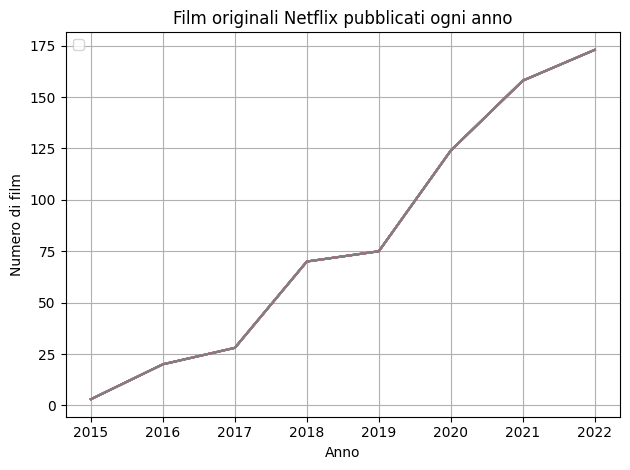

In [ ]:
import matplotlib.pyplot as plt

def plot_film_trend(data):
    years = sorted(data.keys())
    categories = years#["2015", "2016", "2017", "2018", "2019", "2020", ""]  # Sostituisci con le tue categorie
    excluded_category = "2015-2017"
    # Creazione del grafico
    fig, ax = plt.subplots()
    for idx, category in enumerate(categories):
        values = [len(data[year]) for year in years]
        ax.plot(years, values)#, label=category)

    # Impostazioni del grafico
    ax.set_xlabel("Anno")
    ax.set_ylabel("Numero di film")
    ax.set_title("Film originali Netflix pubblicati ogni anno")
    ax.legend(loc="upper left")

    # Visualizzazione del grafico
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Esempio di utilizzo
plot_film_trend(dict_film_years)


In [ ]:
api_key = "67f673c20915f8c42bb43d173f2a926c"

In [ ]:
import requests

def get_movie_genres(movie_id):
    api_key   # Sostituisci 'TUO_API_KEY' con la tua chiave API di The Movie Database
    url = f'https://api.themoviedb.org/3/movie/{movie_id}'
    params = {
        'api_key': api_key
    }
    print(movie_id)
    response = requests.get(url, params=params)
    data = response.json()
    print(data)
    # Controlla se la chiamata ha avuto successo e se l'oggetto 'genres' è presente
    if response.status_code == 200 and 'genres' in data:
        return data['genres']
    else:
        # Restituisce None se la chiamata non ha avuto successo o l'oggetto 'genres' è assente
        return None
# Funzione per ottenere le informazioni di un film tramite l'API di The Movie Database (TMDb)

def get_movie_info(movie_name):
    api_key   # Sostituisci 'TUO_API_KEY' con la tua chiave API di The Movie Database
    url = f'https://api.themoviedb.org/3/search/movie'
    params = {
        'api_key': api_key,
        'query': movie_name
    }

    response = requests.get(url, params=params)
    data = response.json()
    print(data)
    if data['results']:
        # Ritorna solo il primo risultato (il più rilevante)
        return data['results'][0]
    else:
        return None

# Dizionario con chiavi e array di nomi di film
film_dict = dict_film_years

# Itera attraverso il dizionario e aggiorna i film con le informazioni ottenute dall'API
for key, movie_names in film_dict.items():
    print(movie_names)
    for i, movie_name in enumerate(movie_names):
        movie_info = get_movie_info(movie_name)
        print(movie_info)
        if movie_info:
            print("dentro fi")
            genres = get_movie_genres(movie_info['id'])
            print(genres)
            # Aggiungi id e genre_ids come oggetti al film di partenza
            film_dict[key][i] = {
                'title': movie_name,
                'id': movie_info['id'],
                'genre_ids': genres
            }
# Ora il dizionario film_dict contiene le informazioni aggiornate per ciascun film
print(film_dict)


In [ ]:
# Esempio di utilizzo
movie_id = 14  # Sostituisci 12345 con l'ID del film desiderato
genres = get_movie_genres(movie_id)

if genres:
    print(genres)
else:
    print("Impossibile ottenere i generi del film.")

14
{'adult': False, 'backdrop_path': '/DztBnZaqmla2sGUW9s8AyOmskT.jpg', 'belongs_to_collection': None, 'budget': 15000000, 'genres': [{'id': 18, 'name': 'Drama'}], 'homepage': '', 'id': 14, 'imdb_id': 'tt0169547', 'original_language': 'en', 'original_title': 'American Beauty', 'overview': "Lester Burnham, a depressed suburban father in a mid-life crisis, decides to turn his hectic life around after developing an infatuation with his daughter's attractive friend.", 'popularity': 26.669, 'poster_path': '/wby9315QzVKdW9BonAefg8jGTTb.jpg', 'production_companies': [{'id': 2721, 'logo_path': None, 'name': 'Jinks/Cohen Company', 'origin_country': ''}, {'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw00pVIS9.png', 'name': 'DreamWorks Pictures', 'origin_country': 'US'}], 'production_countries': [{'iso_3166_1': 'US', 'name': 'United States of America'}], 'release_date': '1999-09-15', 'revenue': 356296601, 'runtime': 122, 'spoken_languages': [{'english_name': 'English', 'iso_639_1': 'en', 'name': 'En

In [ ]:
import json
# Specifica il nome del file in cui vuoi salvare il dizionario JSON
file_name = '/work/netflix/movies_info.json'

# Salvare il dizionario come JSON utilizzando json.dump()
with open(file_name, 'w', encoding='utf-8') as json_file:
    json.dump(film_dict, json_file, ensure_ascii=False, indent=4)

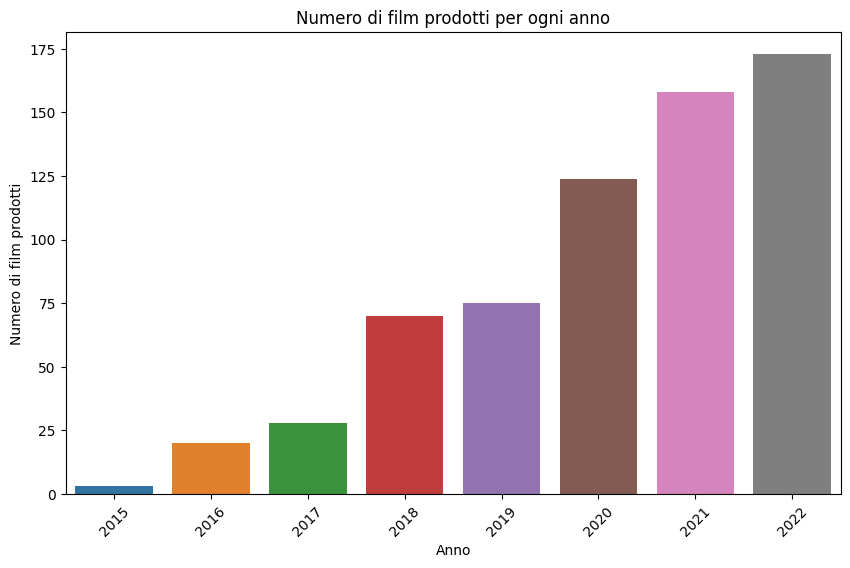

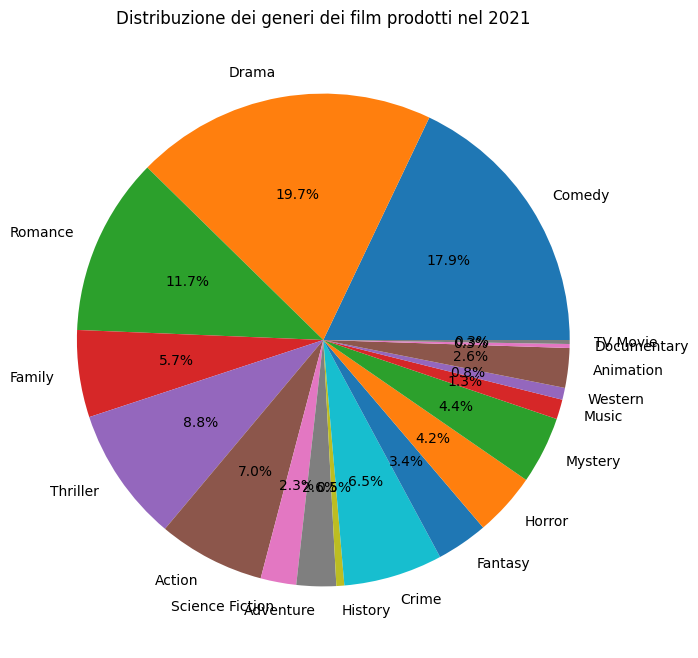

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Il dizionario con le informazioni sui film per ogni anno
films_dict = film_dict

# Calcola il numero di film prodotti per ogni anno
films_count_per_year = {year: len(films) for year, films in films_dict.items()}

# Ordina il dizionario per anno
films_count_per_year_sorted = sorted(films_count_per_year.items())

# Estrai gli anni e i conteggi ordinati
years_sorted = [year for year, _ in films_count_per_year_sorted]
counts_sorted = [count for _, count in films_count_per_year_sorted]

# Creazione di un grafico a barre per visualizzare il numero di film prodotti per ogni anno
plt.figure(figsize=(10, 6))
sns.barplot(x=years_sorted, y=counts_sorted)
plt.xlabel('Anno')
plt.ylabel('Numero di film prodotti')
plt.title('Numero di film prodotti per ogni anno')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.show()

# Creazione di un grafico a torta per visualizzare i generi dei film prodotti per l'anno specificato (es. 2021)
year_to_visualize = "2021"
films_for_year = films_dict.get(year_to_visualize, [])

genres_count = {}
for film in films_for_year:
    for genre in film['genre_ids']:
        genre_name = genre['name']
        genres_count[genre_name] = genres_count.get(genre_name, 0) + 1

plt.figure(figsize=(8, 8))
plt.pie(list(genres_count.values()), labels=list(genres_count.keys()), autopct='%1.1f%%')
plt.title(f'Distribuzione dei generi dei film prodotti nel {year_to_visualize}')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b17472ce-9019-45c2-b7a5-003e54110578' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>